In [2]:
# loading the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [3]:
# loading the data provided
campaign_types = pd.read_csv("/Users/arg000m/Downloads/Data-2/campaign_types.csv")

events = pd.read_csv("/Users/arg000m/Downloads/Data-2/events.csv")

Opens = pd.read_csv("/Users/arg000m/Downloads/Data-2/Opens.csv")

Sends = pd.read_csv("/Users/arg000m/Downloads/Data-2/Sends.csv")

UserInfo = pd.read_csv("/Users/arg000m/Downloads/Data-2/UserInfo.csv")

In [117]:
UserInfo['sub_source'].unique()

array(['eReceipt_Physical', 'Other_Other', 'Checkout_Online',
       'POS form_Physical', 'Lightbox_Desktop', 'Join_Mobile',
       'Footer_Desktop', 'Warehouse_Mobile', 'Join_Desktop',
       'My Account_Mobile', 'My Account_Desktop', 'Warehouse_Desktop',
       'Lightbox_Mobile', 'Footer_Mobile', 'Facebook CPL_Online',
       'Sports/Brand_Online'], dtype=object)

In [4]:
# finding out the null value columns in all the datasets
datasets = [campaign_types,Sends,Opens,events,UserInfo]

for dataset in datasets:
    print dataset.isnull().sum()

launch_id    0
camptype     0
dtype: int64
riid                0
campaign_send_dt    0
opened              0
dtype: int64
riid                0
campaign_send_dt    0
optout              0
dtype: int64
riid                     0
event                    0
event_captured_dt    45760
cnts                     0
dtype: int64
riid          0
aq_dt         0
sub_source    0
dtype: int64


## EDA

In [5]:
# unique riid count in all the datasets

len(Sends['riid'].unique()),len(Sends['riid']),len(Opens['riid'].unique()),len(Opens['riid']),len(events['riid'].unique()),len(events['riid']),len(UserInfo['riid'].unique()),len(UserInfo['riid'])

#

(47617, 100000, 30567, 100000, 58741, 8358444, 200000, 200000)

In [6]:
# combine sends, campaign type and user information
Sends_ctype_uinfo = pd.merge(Sends, campaign_types, how = 'left', left_on ='campaign_send_dt', right_on = 'launch_id').merge(UserInfo, how = 'left' , on = 'riid')

In [7]:
#checks 
len(Sends_ctype_uinfo['riid'].unique()),len(Sends_ctype_uinfo['riid'])


(47617, 100000)

In [8]:
Sends_ctype_uinfo['opened'].value_counts()

0    81374
1    18626
Name: opened, dtype: int64

In [9]:
#Sends_ctype_uinfo['sub_source'].value_counts()
Sends_ctype_uinfo.isnull().sum()

riid                  0
campaign_send_dt      0
opened                0
launch_id           467
camptype            467
aq_dt                 0
sub_source            0
dtype: int64

In [10]:
Sends_ctype_uinfo['camptype'].value_counts()

Heavy Promo - Dedicated Messaging    37617
Light Promo                          19842
Light Promo - Secondary Messaging    18917
Heavy Promo - Secondary Messaging    17800
No Promo                              3196
Heavy Promo                           2161
Name: camptype, dtype: int64

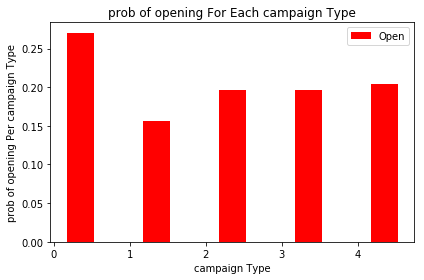

In [11]:
barwidth = 0.35
ctype_open_pivot = pd.pivot_table(Sends_ctype_uinfo, index=["camptype"],values='opened',aggfunc=('mean')).head()
index = np.arange(len(ctype_open_pivot.index))

plt.bar(index+barwidth,pd.DataFrame(ctype_open_pivot).reset_index()['opened'],barwidth,color='r',label='Open')
plt.ylabel('prob of opening Per campaign Type')
plt.xlabel('campaign Type')
plt.title('prob of opening For Each campaign Type')
plt.legend()
plt.tight_layout()


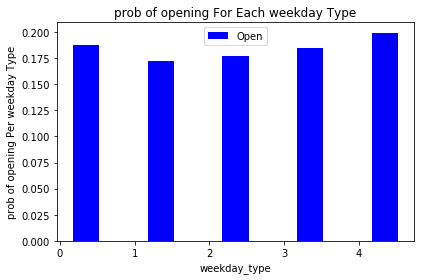

In [69]:

barwidth = 0.35
ctype_open_pivot = pd.pivot_table(final, index=["weekday_type"],values='opened',aggfunc=('mean')).head()


index = np.arange(len(ctype_open_pivot.index))

plt.bar(index+barwidth,pd.DataFrame(ctype_open_pivot).reset_index()['opened'],barwidth,color='b',label='Open')

plt.ylabel('prob of opening Per weekday Type')
plt.xlabel('weekday_type')
plt.title('prob of opening For Each weekday Type')
plt.legend()
plt.tight_layout()

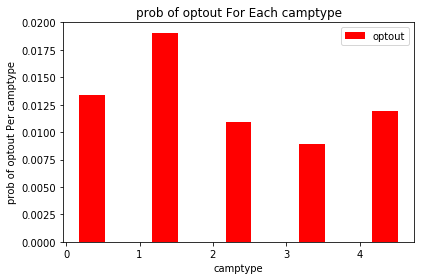

In [103]:

barwidth = 0.35
ctype_optout_pivot = pd.pivot_table(final_opt, index=["camptype"],values='optout',aggfunc=('mean')).head()


index = np.arange(len(ctype_optout_pivot.index))

plt.bar(index+barwidth,pd.DataFrame(ctype_optout_pivot).reset_index()['optout'],barwidth,color='r',label='optout')

plt.ylabel('prob of optout Per camptype')
plt.xlabel('camptype')
plt.title('prob of optout For Each camptype')
plt.legend()
plt.tight_layout()

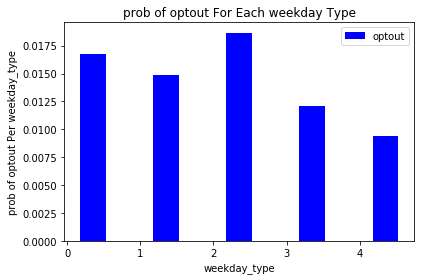

In [113]:
ctype_optout_pivot = pd.pivot_table(final_opt, index=["weekday_type"],values='optout',aggfunc=('mean')).head()

index = np.arange(len(ctype_open_pivot.index))
plt.bar(index+barwidth,pd.DataFrame(ctype_optout_pivot).reset_index()['optout'],barwidth,color='b',label='optout')

plt.ylabel('prob of optout Per weekday_type')
plt.xlabel('weekday_type')
plt.title('prob of optout For Each weekday Type')
plt.legend()
plt.tight_layout()

## Aggregate open rate for the sample provided in the “Sends” table

In [12]:
def Openrate(data):
    return float(data['opened'].sum()/float(len(data['campaign_send_dt'])))

In [13]:
Openrate(Sends)

0.18626

### Aggregate Unsub per Open (UPO) rate from the “Opens” table

In [14]:
def Unsub_per_open(data):
    return float(data['optout'].sum()/float(len(data['campaign_send_dt'])))

In [15]:
Unsub_per_open(Opens)  

0.01374

### 2. Calculate the open and UPO rates and count of customers at the following granularities:

 #### a. launch_id

In [82]:
Launch_id_open = Sends_ctype_uinfo.groupby(['launch_id']).agg({'opened':sum,
                                                               
                                     'campaign_send_dt': 'count', 
                                     'riid': pd.Series.nunique })

Launch_id_open['openrate'] = Launch_id_open['opened']/Launch_id_open['campaign_send_dt']


In [83]:
Launch_id_open.head()

,riid,opened,campaign_send_dt,openrate
launch_id,,,,
2018-01-01,1084,310,1084,0.285978
2018-01-03,4575,790,4575,0.172678
2018-01-05,2074,502,2074,0.242044
2018-01-07,2582,501,2582,0.194036
2018-01-08,1606,337,1606,0.209838


In [92]:
Launch_id_optout = final_opt.groupby(['launch_id']).agg({'optout':sum,                                                               
                                     'campaign_send_dt': 'count', 
                                     'riid': pd.Series.nunique })

Launch_id_optout['optoutrate'] = Launch_id_optout['optout']/Launch_id_optout['campaign_send_dt']


In [93]:
Launch_id_optout.head()

,riid,campaign_send_dt,optout,optoutrate
launch_id,,,,
2018-01-01,1475,1475,29,0.019661
2018-01-03,4704,4704,130,0.027636
2018-01-05,2671,2671,42,0.015724
2018-01-07,2422,2422,27,0.011148
2018-01-08,1712,1712,24,0.014019


### # b. User Sub source 

In [94]:
# b. User Sub source 
sub_source_open = Sends_ctype_uinfo.groupby(['sub_source']).agg({'opened':sum,
                                                             'campaign_send_dt': 'count',
                                     'riid': pd.Series.nunique })

sub_source_open['openrate'] = sub_source_open['opened']/sub_source_open['campaign_send_dt']


In [119]:
sub_source_open.head()

,riid,opened,campaign_send_dt,openrate
sub_source,,,,
Checkout_Online,11195,5091,26189,0.194395
Facebook CPL_Online,421,125,830,0.150602
Footer_Desktop,1230,555,2537,0.218762
Footer_Mobile,1046,407,2221,0.183251
Join_Desktop,727,283,1532,0.184726


In [96]:
# b. User Sub source 
sub_source_optout = final_opt.groupby(['sub_source']).agg({'optout':sum,
                                                             'campaign_send_dt': 'count', 
                                     'riid': pd.Series.nunique })

sub_source_optout['optoutrate'] = sub_source_optout['optout']/sub_source_optout['campaign_send_dt']




In [98]:
sub_source_optout

,riid,campaign_send_dt,optout,optoutrate
sub_source,,,,
Checkout_Online,6997,26131,407,0.015575
Facebook CPL_Online,250,735,2,0.002721
Footer_Desktop,843,2874,55,0.019137
Footer_Mobile,653,2273,31,0.013638
Join_Desktop,487,1523,37,0.024294
Join_Mobile,130,380,6,0.015789
Lightbox_Desktop,4953,15120,301,0.019907
Lightbox_Mobile,1865,5672,100,0.017630
My Account_Desktop,193,705,1,0.001418


### #c. User Month of acquisition

In [124]:
Sends_ctype_uinfo['month'] = pd.DatetimeIndex(Sends_ctype_uinfo['aq_dt']).month
month_open = Sends_ctype_uinfo.groupby(['month']).agg({'opened':sum,
                                                               'opened':sum , 
                                     'campaign_send_dt': 'count', 
                                     'riid': pd.Series.nunique })

month_open['openrate'] = month_open['opened']/month_open['campaign_send_dt']


In [125]:
month_open.head()

,riid,opened,campaign_send_dt,openrate
month,,,,
1,3235,1312,6287,0.208685
2,2819,1031,5516,0.186911
3,4492,1982,10448,0.189701
4,3001,1199,6485,0.184888
5,3437,1420,7609,0.186621


In [100]:
final_opt['month'] = pd.DatetimeIndex(final_opt['aq_dt']).month
month_optout = final_opt.groupby(['month']).agg({'optout':sum,
                                                               'optout':sum , 
                                                 'campaign_send_dt': 'count', 
                                     'riid': pd.Series.nunique })



month_optout['optout_rate'] = month_optout['optout']/month_optout['campaign_send_dt']

In [101]:
month_optout.head()

,riid,campaign_send_dt,optout,optout_rate
month,,,,
1,2451,7516,138,0.018361
2,2296,5911,109,0.018440
3,2646,10011,78,0.007791
4,1794,6386,64,0.010022
5,2123,7371,101,0.013702


## Relationship between tenure and opening the mail - visualization

In [102]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
final['binned'] = pd.cut(final['tenure']/30, bins)
opend_avg = final.groupby('binned').agg({"opened": [np.mean, np.sum]})

In [272]:
plot_final = final.groupby('binned').agg({"opened": [np.mean, np.sum, 'count']})

In [273]:
plot_final.columns = plot_final.columns.droplevel(0)

In [274]:
plot_final = plot_final.reset_index()

In [276]:
plot_final.columns = ["binned_months", "Open rate Avg", "Sum", "Count"]

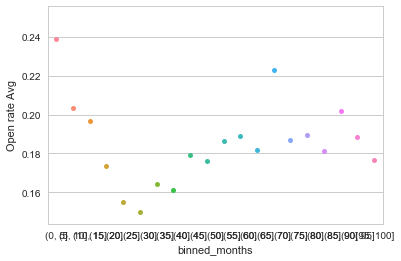

In [278]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
fig.set_size_inches(15, 29)
sns.stripplot(x="binned_months", y="Open rate Avg", data=plot_final);

#### From the above plot, we can see that the effect of tenure on Avg email Open rate has different effect at different values of tenure.
#### Till 25-30 months tenure, the email open rate is decreasing and from there we can see it increasing.
#### Also, after the 85 - 90th month the open rate is decreasing


## Modeling methodology

## Feature engineering

In [17]:
events['cnts_OPEN'] = np.where(events['event'] == 'OPEN', events['cnts'], 0)   
events['cnts_CLICK'] = np.where(events['event'] == 'CLICK', events['cnts'], 0)   
events['cnts_ONLINE PURCH'] = np.where(events['event'] == 'ONLINE PURCH', events['cnts'], 0)   
events['cnts_SENT'] = np.where(events['event'] == 'SENT', events['cnts'], 0)   

In [18]:
events1 = events.groupby(['riid','event_captured_dt']).agg({'cnts_OPEN':sum,      # find the sum of the durations for each group
                                     'cnts_CLICK': sum, # find the number of network type entries
                                     'cnts_ONLINE PURCH': sum,
                           'cnts_SENT': sum}, as_index =False).reset_index()

In [19]:
events1['cnts_OPEN_csum'] = events1.sort_values(["riid","event_captured_dt"]).groupby(['riid'])['cnts_OPEN'].apply(lambda x: x.cumsum())
events1['cnts_CLICK_csum'] = events1.sort_values(["riid","event_captured_dt"]).groupby(['riid'])['cnts_CLICK'].apply(lambda x: x.cumsum())
events1['cnts_ONLINE PURCH_csum'] = events1.sort_values(["riid","event_captured_dt"]).groupby(['riid'])['cnts_ONLINE PURCH'].apply(lambda x: x.cumsum())
events1['cnts_SENT_csum'] = events1.sort_values(["riid","event_captured_dt"]).groupby(['riid'])['cnts_SENT'].apply(lambda x: x.cumsum())

In [20]:
events_sum_2018 = events1[events1['event_captured_dt'] > '2017-12-31']

In [21]:
final = pd.merge(Sends_ctype_uinfo,events_sum_2018, how ='left', left_on = ['riid','campaign_send_dt'], right_on =['riid','event_captured_dt'], indicator ='True')

In [22]:
columns_todrop = ['launch_id', 'event_captured_dt', 'cnts_OPEN', 'cnts_CLICK', 'cnts_ONLINE PURCH', 'cnts_SENT', 'True']
final.drop(columns_todrop, axis = 1, inplace = True)

In [23]:
# feature engineering
import datetime
import time
final['tenure'] = pd.to_datetime(final['campaign_send_dt']) - pd.to_datetime(final['aq_dt']) 
final['tenure'].fillna(0)
final['tenure'] =  (final['tenure'] / np.timedelta64(1, 'D')).astype(int)
final['weekday_type'] = final['campaign_send_dt'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().isoweekday())


final = final.sort_values(by= "campaign_send_dt").reset_index(drop=True)
final["user_cum_count"] = final.groupby('riid').cumcount()

final["campaign_send_dt"] = pd.to_datetime(final["campaign_send_dt"], format="%Y-%m-%d")
final["ordinal_date"] = final["campaign_send_dt"].apply(lambda x: time.mktime(x.timetuple()))


final["user_prev_date"] = final.groupby("riid")["campaign_send_dt"].shift(1)
final["user_date_diff"] = pd.to_datetime(final["campaign_send_dt"]) - pd.to_datetime(final["user_prev_date"])



gdf = final.groupby("riid")["ordinal_date"].agg(["min", "mean", "max", "std"]).reset_index()
gdf.columns = ["riid", "user_min_date", "user_mean_date", "user_max_date", "user_std_date"]
final = pd.merge(final, gdf, on="riid")


In [24]:
# One hot encoding of categorical variables

cols_to_transform = ['camptype','sub_source', 'weekday_type']
df_with_dummies = pd.get_dummies( final[['opened','campaign_send_dt',
 'camptype',
 'sub_source',
 'cnts_OPEN_csum',
 'cnts_CLICK_csum',
 'cnts_ONLINE PURCH_csum',
 'cnts_SENT_csum',
 'tenure',
 'weekday_type',
 'user_cum_count',
 'user_date_diff',
 'user_min_date',
 'user_mean_date',
 'user_max_date',
 'user_std_date']], columns = cols_to_transform )

In [25]:
columns = [
 'camptype_Heavy Promo',
 'camptype_Heavy Promo - Dedicated Messaging',
 'camptype_Heavy Promo - Secondary Messaging',
 'camptype_Light Promo',
 'camptype_Light Promo - Secondary Messaging',
 'camptype_No Promo',
 'sub_source_Checkout_Online',
 'sub_source_Facebook CPL_Online',
 'sub_source_Footer_Desktop',
 'sub_source_Footer_Mobile',
 'sub_source_Join_Desktop',
 'sub_source_Join_Mobile',
 'sub_source_Lightbox_Desktop',
 'sub_source_Lightbox_Mobile',
 'sub_source_My Account_Desktop',
 'sub_source_My Account_Mobile',
 'sub_source_Other_Other',
 'sub_source_POS form_Physical',
 'sub_source_Sports/Brand_Online',
 'sub_source_Warehouse_Desktop',
 'sub_source_Warehouse_Mobile',
 'sub_source_eReceipt_Physical',
 'weekday_type_1',
 'weekday_type_2',
 'weekday_type_3',
 'weekday_type_4',
 'weekday_type_5',
 'weekday_type_7'
    
]

for col in columns:
    df_with_dummies[col] = df_with_dummies[col].astype('category')



In [26]:
df_with_dummies.fillna(0, inplace=True)
df_with_dummies['user_date_diff'] =  (df_with_dummies['user_date_diff'] / np.timedelta64(1, 'D')).astype(int)

In [27]:
final_train = df_with_dummies[df_with_dummies['campaign_send_dt'] <= '2018-02-15']

final_test = df_with_dummies[df_with_dummies['campaign_send_dt'] > '2018-02-15']

In [28]:
X_train_col = ['cnts_OPEN_csum',
 'cnts_CLICK_csum',
 'cnts_ONLINE PURCH_csum',
 'cnts_SENT_csum',
 'tenure',
 'user_cum_count',
 'user_date_diff',
 'user_min_date',
 'user_mean_date',
 'user_max_date',
 'user_std_date',
 'camptype_Heavy Promo',
 'camptype_Heavy Promo - Dedicated Messaging',
 'camptype_Heavy Promo - Secondary Messaging',
 'camptype_Light Promo',
 'camptype_Light Promo - Secondary Messaging',
 'camptype_No Promo',
 'sub_source_Checkout_Online',
 'sub_source_Facebook CPL_Online',
 'sub_source_Footer_Desktop',
 'sub_source_Footer_Mobile',
 'sub_source_Join_Desktop',
 'sub_source_Join_Mobile',
 'sub_source_Lightbox_Desktop',
 'sub_source_Lightbox_Mobile',
 'sub_source_My Account_Desktop',
 'sub_source_My Account_Mobile',
 'sub_source_Other_Other',
 'sub_source_POS form_Physical',
 'sub_source_Sports/Brand_Online',
 'sub_source_Warehouse_Desktop',
 'sub_source_Warehouse_Mobile',
 'sub_source_eReceipt_Physical',
 'weekday_type_1',
 'weekday_type_2',
 'weekday_type_3',
 'weekday_type_4',
 'weekday_type_5',
 'weekday_type_7']
# Fit and transform x to visualise inside a 2D feature space
# Instanciate a PCA object for the sake of easy visualisation

X_train = final_train[X_train_col].values
X_test = final_test[X_train_col].values


y_train = final_train['opened'].values
y_test = final_test['opened'].values

### resampling techniques

In [24]:
from sklearn import metrics 
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline_xgb(X_train, X_test, y_train, y_test):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {},
              'combined' : {}}
    
    # ------ No balancing ------
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    bst = xgb.train(params, dtrain, num_rounds)
    predictions = (bst.predict(dtest) > 0.5).astype('int')
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['ordinary'] = {'accuracy': accuracy, 
                                                'precision': precision, 
                                                'recall': recall,
                                                'fscore': fscore, 
                                                'n_occurences': support,
                                                'predictions_count': Counter(predictions),
                                                'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                                'auc': auc}

    
    
    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN()]
    
    for sampler in techniques:
        technique1 = sampler.__class__.__name__
        print("Technique:%s" % technique1)
        print ("Before resampling: %s" % sorted(Counter(y_train).items()))
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print ("After resampling : %s" % sorted(Counter(y_resampled).items()))


        dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
        dtest = xgb.DMatrix(X_test)
        bst = xgb.train(params, dtrain, num_rounds)
        
        importance = gbdt.get_fscore(fmap='xgb.fmap')
        importance = sorted(importance.items(), key=operator.itemgetter(1))

        df = pd.DataFrame(importance, columns=['feature', 'fscore'])
        df['fscore'] = df['fscore'] / df['fscore'].sum()

        plt.figure()
        df.plot()
        df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
        plt.title('XGBoost Feature Importance')
        plt.xlabel('relative importance')
        plt.gcf().savefig('feature_importance_xgb.png')
 
        
        
        predictions = (bst.predict(dtest) > 0.5).astype('int')
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique1] = {'accuracy': accuracy, 
                                                    'precision': precision, 
                                                    'recall': recall,
                                                    'fscore': fscore, 
                                                    'n_occurences': support,
                                                    'predictions_count': Counter(predictions),
                                                    'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                                    'auc': auc}
    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    
    
    for sampler in techniques:
        technique1 = sampler.__class__.__name__
        if technique1 == 'NearMiss': technique1+=str(sampler.version)
        print("Technique:%s" % technique1)
        print ("Before resampling: %s" % sorted(Counter(y_train).items()))
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print ("After resampling : %s" % sorted(Counter(y_resampled).items()))

        dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
        dtest = xgb.DMatrix(X_test)
        bst = xgb.train(params, dtrain, num_rounds)
       
        
        
        
        predictions = (bst.predict(dtest) > 0.5).astype('int')
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique1] = {'accuracy': accuracy, 
                                                    'precision': precision, 
                                                    'recall': recall,
                                                    'fscore': fscore, 
                                                    'n_occurences': support,
                                                    'predictions_count': Counter(predictions),
                                                    'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                                    'auc': auc}        
        # ------------ Combined TECHNIQUES ------------
    print('------ combined methods ------')
    techniques = [SMOTEENN(),
                   SMOTETomek()
                 ]
    
    for sampler in techniques:
        technique1 = sampler.__class__.__name__
        if technique1 == 'NearMiss': technique1+=str(sampler.version)
        print("Technique:%s" % technique1)
        print ("Before resampling: %s" % sorted(Counter(y_train).items()))
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print ("After resampling : %s" % sorted(Counter(y_resampled).items()))

        dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
        dtest = xgb.DMatrix(X_test)
        bst = xgb.train(params, dtrain, num_rounds)
        predictions = (bst.predict(dtest) > 0.5).astype('int')
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['combined'][technique1] = {'accuracy': accuracy, 
                                                    'precision': precision, 
                                                    'recall': recall,
                                                    'fscore': fscore, 
                                                    'n_occurences': support,
                                                    'predictions_count': Counter(predictions),
                                                    'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                                    'auc': auc}        


    return results

In [25]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title("not opened: %s"  % metric)
        ax[i*2+1].set_title("opened: %s" % metric)
    
    # AUC vis
    ax[6].set_title("Area under curve")
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

In [76]:
def evaluate_method_optout(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title("not optout: %s"  % metric)
        ax[i*2+1].set_title("optout: %s" % metric)
    
    # AUC vis
    ax[6].set_title("Area under curve")
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

In [26]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.ensemble import EasyEnsemble 
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split

# reproducibility
seed = 123
params = {
    'objective':'binary:logistic',
    'max_depth':8,
    'silent':1,
    'eta':0.01,
    "subsample" : 0.7,
    "min_child_weight" : 10    
}

num_rounds = 15
results = model_resampling_pipeline_xgb(X_train, X_test, y_train, y_test)

/Users/arg000m/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


------ Oversampling methods ------
Technique:RandomOverSampler
Before resampling: [(0, 59260), (1, 14119)]
After resampling : [(0, 59260), (1, 59260)]
Technique:SMOTE
Before resampling: [(0, 59260), (1, 14119)]
After resampling : [(0, 59260), (1, 59260)]
Technique:ADASYN
Before resampling: [(0, 59260), (1, 14119)]
After resampling : [(0, 59260), (1, 60741)]
------ Undersampling methods ------
Technique:RandomUnderSampler
Before resampling: [(0, 59260), (1, 14119)]
After resampling : [(0, 14119), (1, 14119)]
Technique:NearMiss1
Before resampling: [(0, 59260), (1, 14119)]
After resampling : [(0, 14119), (1, 14119)]
Technique:NearMiss2
Before resampling: [(0, 59260), (1, 14119)]


KeyboardInterrupt: 

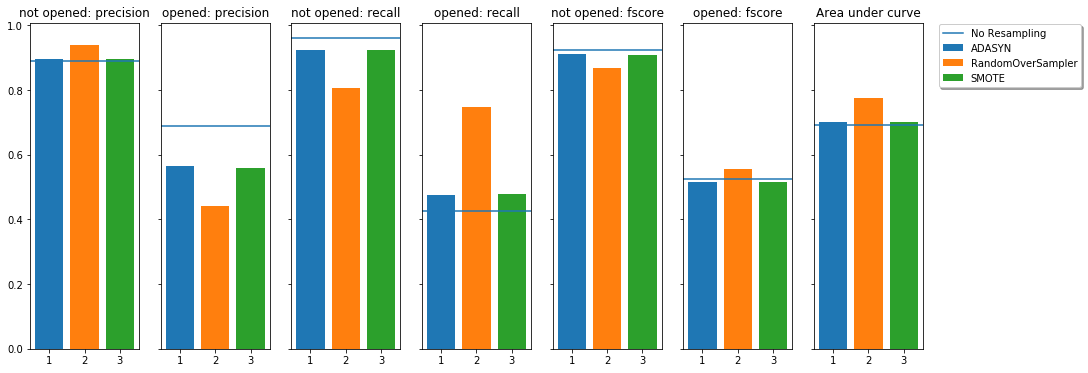

In [39]:
evaluate_method(results, 'oversample')

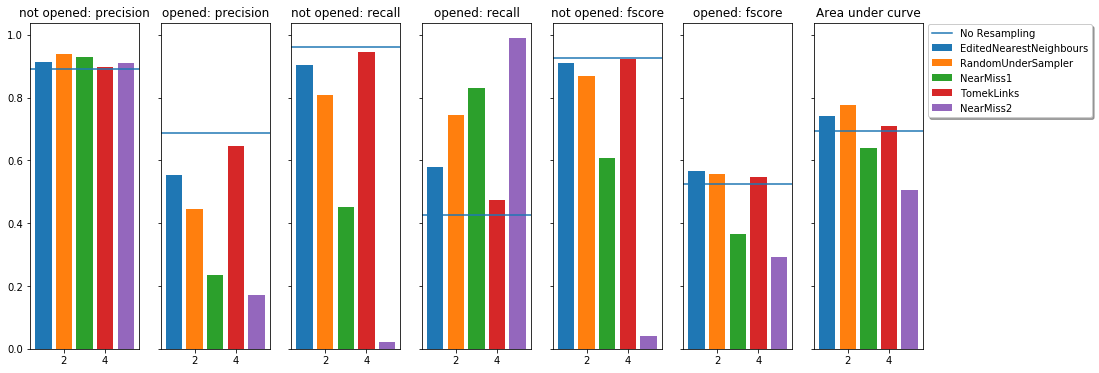

In [40]:
evaluate_method(results, 'undersample')

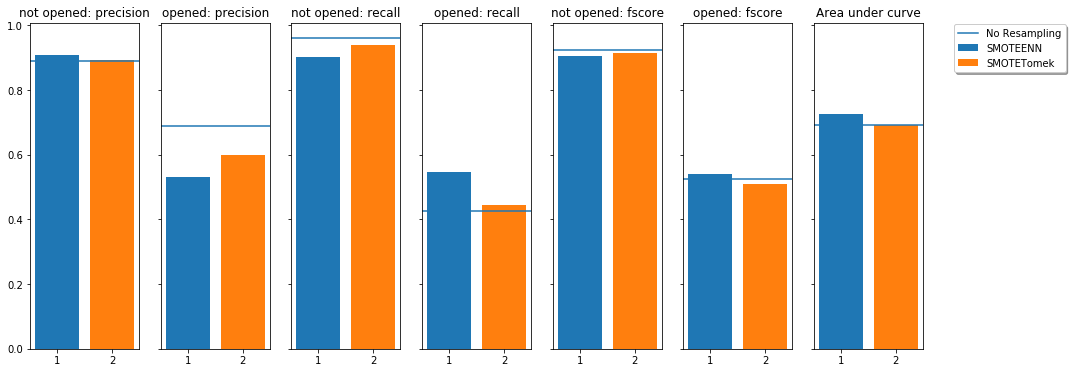

In [41]:
evaluate_method(results, 'combined')

In [371]:
results

{'class_weight': {},
 'combined': {'SMOTEENN': {'accuracy': 0.8404267307764547,
   'auc': 0.7007968611888065,
   'fn': 2300,
   'fp': 1948,
   'fscore': array([0.90471063, 0.50958208]),
   'n_occurences': array([22114,  4507]),
   'precision': array([0.89762307, 0.53116727]),
   'predictions_count': Counter({0: 22466, 1: 4155}),
   'recall': array([0.91191101, 0.48968272]),
   'tn': 20166,
   'tp': 2207},
  'SMOTETomek': {'accuracy': 0.8492167837421585,
   'auc': 0.6789707995756061,
   'fn': 2607,
   'fp': 1407,
   'fscore': array([0.9116404 , 0.48630663]),
   'n_occurences': array([22114,  4507]),
   'precision': array([0.88817878, 0.57453886]),
   'predictions_count': Counter({0: 23314, 1: 3307}),
   'recall': array([0.93637515, 0.42156645]),
   'tn': 20707,
   'tp': 1900}},
 'ordinary': {'accuracy': 0.8612749333233162,
  'auc': 0.6760708759713945,
  'fn': 2722,
  'fp': 971,
  'fscore': array([0.91968072, 0.49153242]),
  'n_occurences': array([22114,  4507]),
  'precision': array([0.

# predict Optout

In [45]:
Opens_ctype_uinfo = pd.merge(Opens, campaign_types, how = 'left', left_on ='campaign_send_dt', right_on = 'launch_id').merge(UserInfo, how = 'left' , on = 'riid')

In [46]:
Opens.columns

Index([u'riid', u'campaign_send_dt', u'optout'], dtype='object')

In [47]:
# getting which customer opened the campaign mail from the Sends table

Opens_opt = pd.merge(Opens_ctype_uinfo, Sends, how = "left" , on = ["riid", "campaign_send_dt"])

In [85]:
final_opt = pd.merge(Opens_opt,events_sum_2018, how ='left', left_on = ['riid','campaign_send_dt'], right_on =['riid','event_captured_dt'], indicator ='True')

In [49]:
final_opt.columns

Index([u'riid', u'campaign_send_dt', u'optout', u'launch_id', u'camptype',
       u'aq_dt', u'sub_source', u'opened', u'event_captured_dt', u'cnts_OPEN',
       u'cnts_ONLINE PURCH', u'cnts_SENT', u'cnts_CLICK', u'cnts_OPEN_csum',
       u'cnts_CLICK_csum', u'cnts_ONLINE PURCH_csum', u'cnts_SENT_csum',
       u'True'],
      dtype='object')

In [105]:
len(final_opt["riid"]),len(final_opt["riid"].unique())

(100000, 30567)

In [106]:
columns_todrop = ['launch_id', 'event_captured_dt', 'cnts_OPEN', 'cnts_CLICK', 'cnts_ONLINE PURCH', 'cnts_SENT', 'True']
final_opt.drop(columns_todrop, axis = 1, inplace = True)

In [107]:
# feature engineering
import datetime
import time
final_opt['tenure'] = pd.to_datetime(final_opt['campaign_send_dt']) - pd.to_datetime(final_opt['aq_dt']) 
final_opt['tenure'].fillna(0)
#final_opt['tenure'] =  (final['tenure'] / np.timedelta64(1, 'D')).astype(int)
final_opt['weekday_type'] = final_opt['campaign_send_dt'].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d').date().isoweekday())


final_opt = final_opt.sort_values(by= "campaign_send_dt").reset_index(drop=True)
final_opt["user_cum_count"] = final_opt.groupby('riid').cumcount()

final_opt["campaign_send_dt"] = pd.to_datetime(final_opt["campaign_send_dt"], format="%Y-%m-%d")
final_opt["ordinal_date"] = final_opt["campaign_send_dt"].apply(lambda x: time.mktime(x.timetuple()))


final_opt["user_prev_date"] = final_opt.groupby("riid")["campaign_send_dt"].shift(1)
final_opt["user_date_diff"] = pd.to_datetime(final_opt["campaign_send_dt"]) - pd.to_datetime(final_opt["user_prev_date"])



gdf_opt = final_opt.groupby("riid")["ordinal_date"].agg(["min", "mean", "max", "std"]).reset_index()
gdf_opt.columns = ["riid", "user_min_date", "user_mean_date", "user_max_date", "user_std_date"]

final_opt = pd.merge(final_opt, gdf_opt, on="riid")

In [108]:

final_opt.isnull().sum()
final_opt['camptype'].value_counts()

final_opt['camptype'] = final_opt['camptype'].fillna("Heavy Promo - Dedicated Messaging")
#final_opt['opened'].value_counts()
final_opt.isnull().sum()
final_opt = final_opt.fillna(0)
final_opt.isnull().sum()

riid                      0
campaign_send_dt          0
optout                    0
camptype                  0
aq_dt                     0
sub_source                0
opened                    0
cnts_OPEN_csum            0
cnts_CLICK_csum           0
cnts_ONLINE PURCH_csum    0
cnts_SENT_csum            0
month                     0
tenure                    0
weekday_type              0
user_cum_count            0
ordinal_date              0
user_prev_date            0
user_date_diff            0
user_min_date             0
user_mean_date            0
user_max_date             0
user_std_date             0
dtype: int64

In [109]:
cols_to_transform = ['camptype','sub_source', 'weekday_type']
df_with_dummies_opt = pd.get_dummies( final_opt[['opened','optout','campaign_send_dt',
 'camptype',
 'sub_source',
 'cnts_OPEN_csum',
 'cnts_CLICK_csum',
 'cnts_ONLINE PURCH_csum',
 'cnts_SENT_csum',
 'tenure',
 'weekday_type',
 'user_cum_count',
 'user_date_diff',
 'user_min_date',
 'user_mean_date',
 'user_max_date',
 'user_std_date']], columns = cols_to_transform )

In [110]:
columns = [
 'camptype_Heavy Promo',
 'camptype_Heavy Promo - Dedicated Messaging',
 'camptype_Heavy Promo - Secondary Messaging',
 'camptype_Light Promo',
 'camptype_Light Promo - Secondary Messaging',
 'camptype_No Promo',
 'sub_source_Checkout_Online',
 'sub_source_Facebook CPL_Online',
 'sub_source_Footer_Desktop',
 'sub_source_Footer_Mobile',
 'sub_source_Join_Desktop',
 'sub_source_Join_Mobile',
 'sub_source_Lightbox_Desktop',
 'sub_source_Lightbox_Mobile',
 'sub_source_My Account_Desktop',
 'sub_source_My Account_Mobile',
 'sub_source_Other_Other',
 'sub_source_POS form_Physical',
 'sub_source_Sports/Brand_Online',
 'sub_source_Warehouse_Desktop',
 'sub_source_Warehouse_Mobile',
 'sub_source_eReceipt_Physical',
 'weekday_type_1',
 'weekday_type_2',
 'weekday_type_3',
 'weekday_type_4',
 'weekday_type_5',
 'weekday_type_7',
  'opened'  
]

for col in columns:
    df_with_dummies_opt[col] = df_with_dummies_opt[col].astype('category')


In [111]:
df_with_dummies_opt['tenure'] =  (df_with_dummies_opt['tenure'] / np.timedelta64(1, 'D')).astype(int)

final_train_opt = df_with_dummies_opt[df_with_dummies_opt['campaign_send_dt'] <= '2018-02-15']

final_test_opt = df_with_dummies_opt[df_with_dummies_opt['campaign_send_dt'] > '2018-02-15']

In [112]:
df_with_dummies_opt['optout'].value_counts()

0    98626
1     1374
Name: optout, dtype: int64

In [43]:
X_train_col_optout = ['cnts_OPEN_csum',
 'cnts_CLICK_csum',
 'cnts_ONLINE PURCH_csum',
 'cnts_SENT_csum',
               'tenure',
 'user_cum_count',
 'user_min_date',
 'user_mean_date',
 'user_max_date',
 'user_std_date',
 'camptype_Heavy Promo',
 'camptype_Heavy Promo - Dedicated Messaging',
 'camptype_Heavy Promo - Secondary Messaging',
 'camptype_Light Promo',
 'camptype_Light Promo - Secondary Messaging',
 'camptype_No Promo',
 'sub_source_Checkout_Online',
 'sub_source_Facebook CPL_Online',
 'sub_source_Footer_Desktop',
 'sub_source_Footer_Mobile',
 'sub_source_Join_Desktop',
 'sub_source_Join_Mobile',
 'sub_source_Lightbox_Desktop',
 'sub_source_Lightbox_Mobile',
 'sub_source_My Account_Desktop',
 'sub_source_My Account_Mobile',
 'sub_source_Other_Other',
 'sub_source_POS form_Physical',
 'sub_source_Sports/Brand_Online',
 'sub_source_Warehouse_Desktop',
 'sub_source_Warehouse_Mobile',
 'sub_source_eReceipt_Physical',
 'weekday_type_1',
 'weekday_type_2',
 'weekday_type_3',
 'weekday_type_4',
 'weekday_type_5',
 'weekday_type_7']
# Fit and transform x to visualise inside a 2D feature space
# Instanciate a PCA object for the sake of easy visualisation

X_train_opt = final_train_opt[X_train_col_optout].values
X_test_opt = final_test_opt[X_train_col_optout].values


y_train_opt = final_train_opt['optout'].values
y_test_opt = final_test_opt['optout'].values

In [44]:
len(X_train_opt), len(X_test_opt), len(y_train_opt), len(y_test_opt)

(73379, 26621, 73379, 26621)

In [83]:
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.ensemble import EasyEnsemble 
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split

# reproducibility
seed = 123
params = {
    'objective':'binary:logistic',
    'max_depth':8,
    'silent':1,
    'eta':0.01,
    "subsample" : 0.7,
    "min_child_weight" : 10    
}

num_rounds = 15
results_optout = model_resampling_pipeline_xgb(X_train_opt, X_test_opt, y_train_opt, y_test_opt)

------ Oversampling methods ------
Technique:RandomOverSampler
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 72375), (1, 72375)]
Technique:SMOTE
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 72375), (1, 72375)]
Technique:ADASYN
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 72375), (1, 72055)]
------ Undersampling methods ------
Technique:RandomUnderSampler
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 1004), (1, 1004)]
Technique:NearMiss1
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 1004), (1, 1004)]
Technique:NearMiss2
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 1004), (1, 1004)]
Technique:TomekLinks
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 71831), (1, 1004)]
Technique:EditedNearestNeighbours
Before resampling: [(0, 72375), (1, 1004)]
After resampling : [(0, 70001), (1, 1004)]
------ combined methods ------
Technique:SMOTEENN
Before

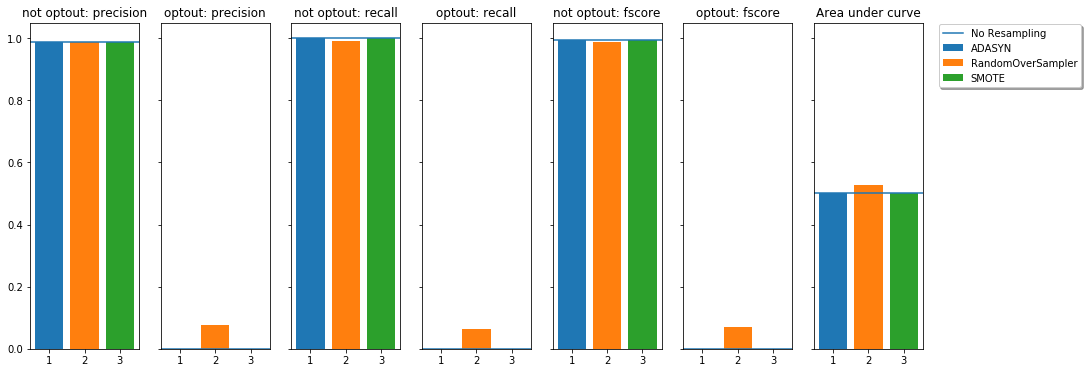

In [84]:
evaluate_method_optout(results_optout, 'oversample')

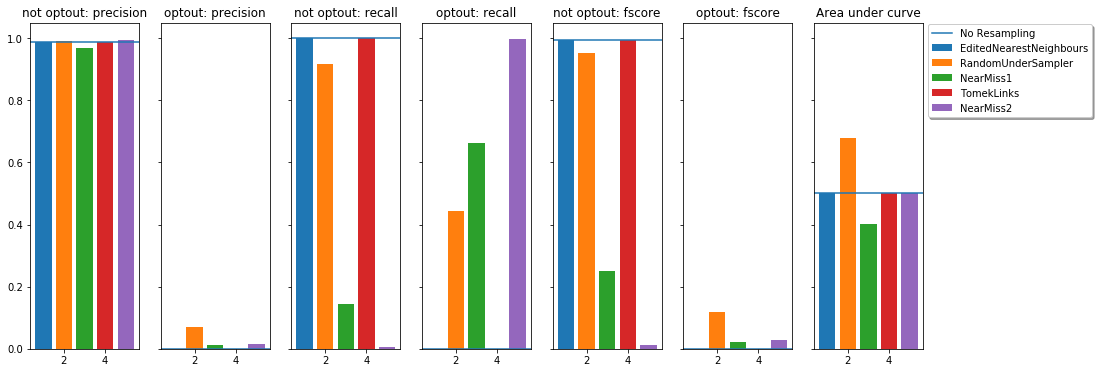

In [85]:
evaluate_method_optout(results_optout, 'undersample')

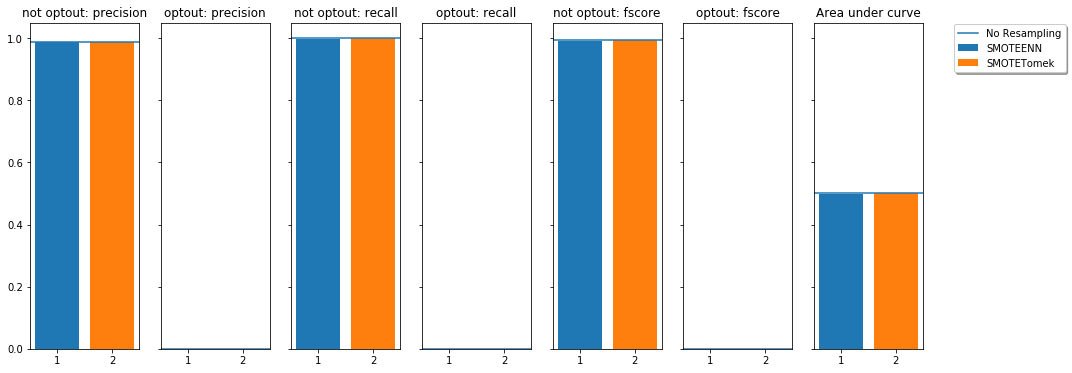

In [86]:
evaluate_method_optout(results_optout, 'combined')

## Q5 As purely a thought exercise, describe how might you balance maximizing engagement rates while minimizing opt-out rates. What other data might you look at in order to inform the decision on appropriate weighting and strategy?

###

Right content personalised to the right cusotmer at the right time is what drives engagement rates  
and minimises optout rates


I would like to look at the following data 

Right content:
1.Title of the mail
2.Content of the mail
3.links, images in the mail

Campaign information
1. campaign information such as what is it about ? what is it promoting ? which item? category ?

Customer details:
Other transaction details on the website to link both of them to have a better understanding about the customer





    
    

    












